In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/train_data.csv")
title_brand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/title_brand.csv')

<ipython-input-2-79427ea3c142>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/train_data.csv")


In [ ]:
title_brand.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [ ]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
df = train_data
df = df.merge(title_brand , on="asin")
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,title,brand
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,Barnes &amp; Noble Nook Color Tablet USB Cable...,Barnes &amp; Noble


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855602 entries, 0 to 855601
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         855602 non-null  int64 
 1   vote            194684 non-null  object
 2   verified        855602 non-null  bool  
 3   reviewTime      855602 non-null  object
 4   reviewerID      855602 non-null  object
 5   asin            855602 non-null  object
 6   style           502073 non-null  object
 7   reviewerName    855393 non-null  object
 8   reviewText      855602 non-null  object
 9   summary         855525 non-null  object
 10  unixReviewTime  855602 non-null  int64 
 11  title           855601 non-null  object
 12  brand           854444 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 85.7+ MB


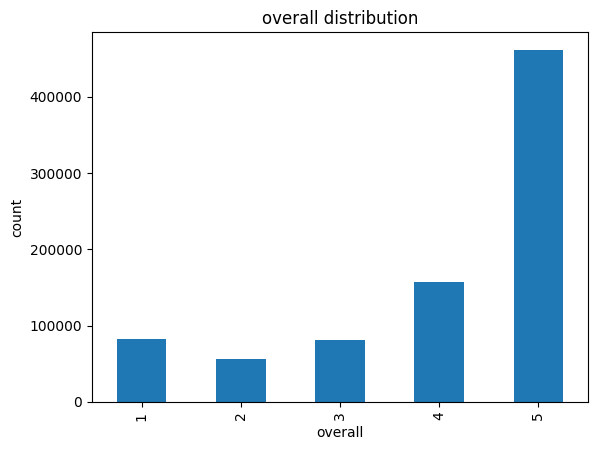

In [ ]:
train_data['overall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('overall')
plt.ylabel('count')
plt.title('overall distribution')
plt.show()

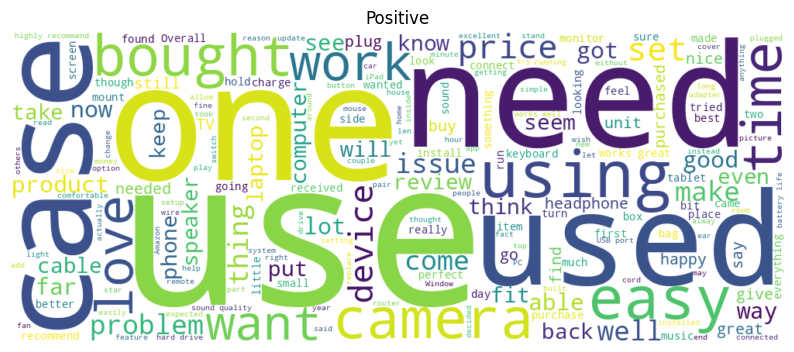

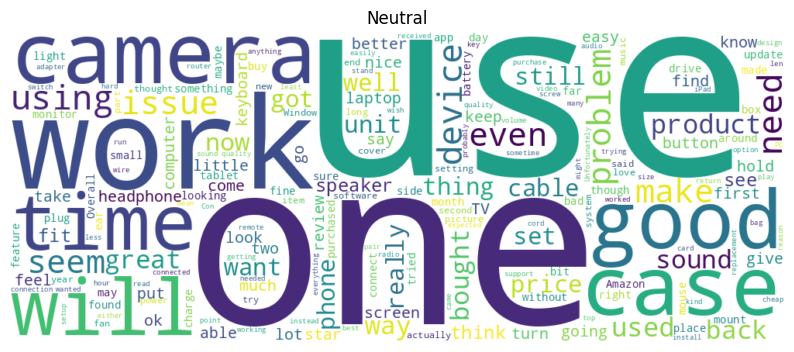

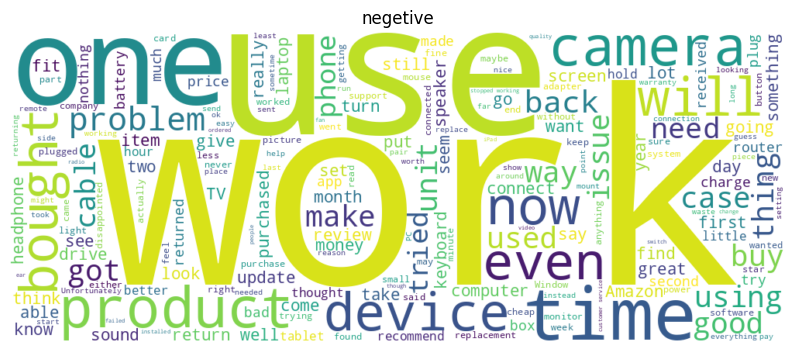

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

positive_reviews = train_data[train_data['overall'].isin([4, 5])]['reviewText']
neutral_reviews = train_data[train_data['overall'] == 3]['reviewText']
negative_reviews = train_data[train_data['overall'].isin([1, 2])]['reviewText']

def generate_and_display_wordcloud(text, title, stop_words=STOPWORDS):
    wordcloud = WordCloud(width=1000, height=400, background_color='white',stopwords=stop_words).generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_and_display_wordcloud(positive_reviews, "Positive")
generate_and_display_wordcloud(neutral_reviews, "Neutral")
generate_and_display_wordcloud(negative_reviews, "negetive")


** کلماتی مثل use و one تکرار شده اند به علت جامع بودن این نوع کلمات در ساخت جملات **


In [ ]:
filtered_df = df[df['vote'].notna()][['reviewerName', 'reviewerID', 'vote']]
filtered_df['vote'] = filtered_df['vote'].str.replace(',', '').astype(float)
grouped_reviewers = filtered_df.groupby(['reviewerID', 'reviewerName'])['vote'].sum()
top_reviewers = grouped_reviewers.reset_index().sort_values(by='vote', ascending=False).head(10)
top_reviewers

,reviewerID,reviewerName,vote
37758,A25GROL6KJV3QG,Benson Leung,4345.0
84236,A3KJ0DF3LTNJ6X,Voltron00x,3096.0
18911,A1KPFZCS71QKW5,nycebo,2978.0
111828,AMYCUX8EWEUVV,Mayra S.,2605.0
103501,ADLVFFE4VBT8,Cthulhu,2605.0
49597,A2IK776FY6MEMG,Obi Wan,2177.0
15129,A1GHPJB2N0D0RL,Chris Upton,2167.0
120204,AW7UMXXJKFSNS,Sally B.,1912.0
61484,A2VQ0V1TWXF3U7,Mark A. Baker,1820.0
98001,A7HWU6R6UQIX6,avirtualcfo,1560.0


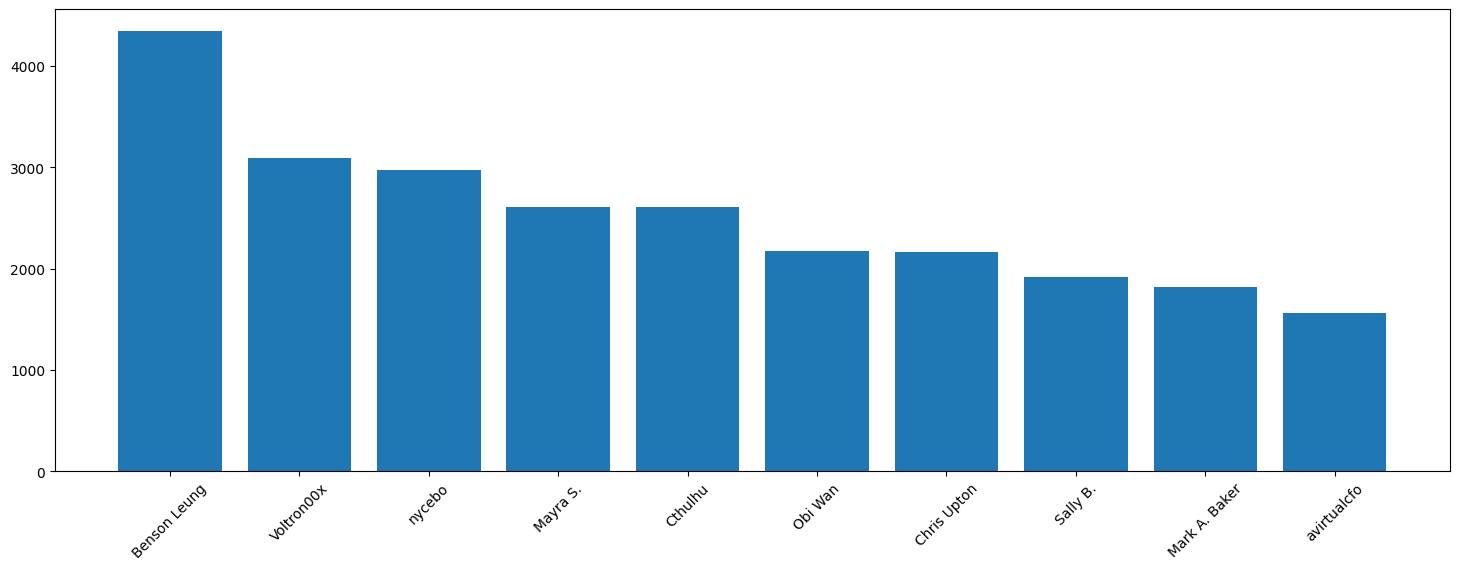

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(top_reviewers['reviewerName'], top_reviewers['vote'])
plt.xticks(rotation=45)
plt.show()

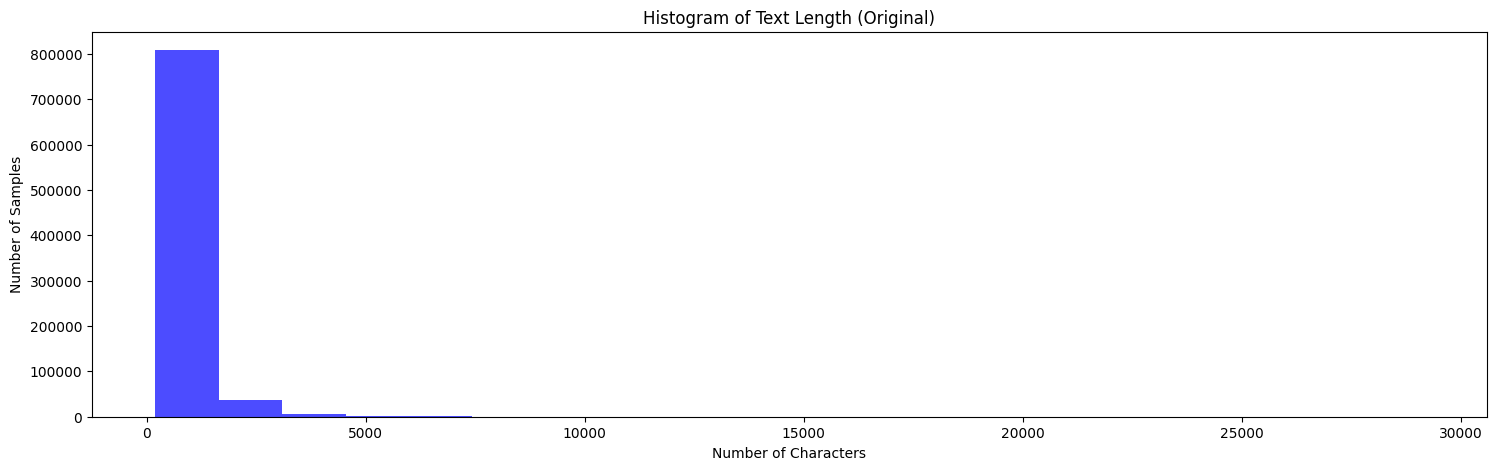

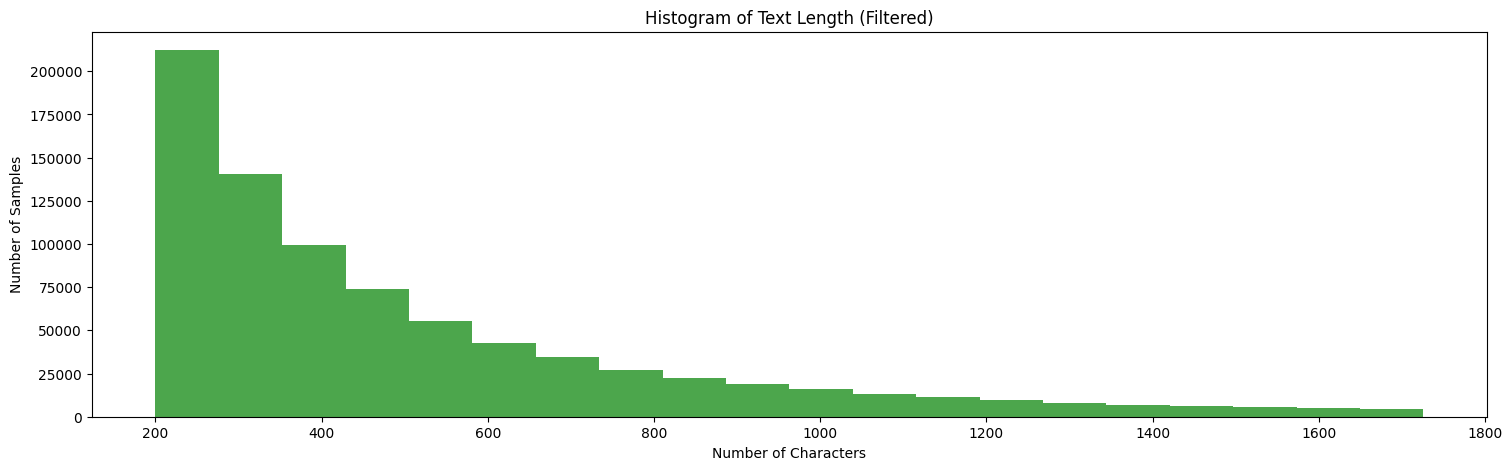

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 5))
plt.hist(df['reviewText'].str.len(), bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Text Length (Original)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Samples')
plt.show()

filtered_df = df[df['reviewText'].str.len() < df['reviewText'].str.len().quantile(0.95)]
plt.figure(figsize=(18, 5))
plt.hist(filtered_df['reviewText'].str.len(), bins=20, color='green', alpha=0.7)
plt.title('Histogram of Text Length (Filtered)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
top_products = df[df['overall'] == 5].groupby(['brand', 'title'])['overall'].count().reset_index()
top_products = top_products.rename(columns={'overall': 'count'})
top_products = top_products.sort_values(by='count', ascending=False)
top_10_products = top_products.head(10)
top_10_products

,brand,title,count
10992,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
39460,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
49185,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
56451,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
34377,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
51240,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
39416,NETGEAR,NETGEAR 5-Port Gigabit Ethernet Unmanaged Swit...,482
5073,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
63425,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
12377,Cheetah,Cheetah Mounts APFMSB TV Wall Mount Bracket fo...,434
